## Exploring the algal mortality

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from copy import copy

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [14]:
region = 'EqPac'
mortality = [0.16, 0.39, 0.5]
runtime = 20                  # [days]
dt = 30                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'no'

In [15]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality[0])[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality[1])[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality[2])[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [16]:
dslist = [ds_0, ds_1, ds_2]

#### Mortality colormap

In [17]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']

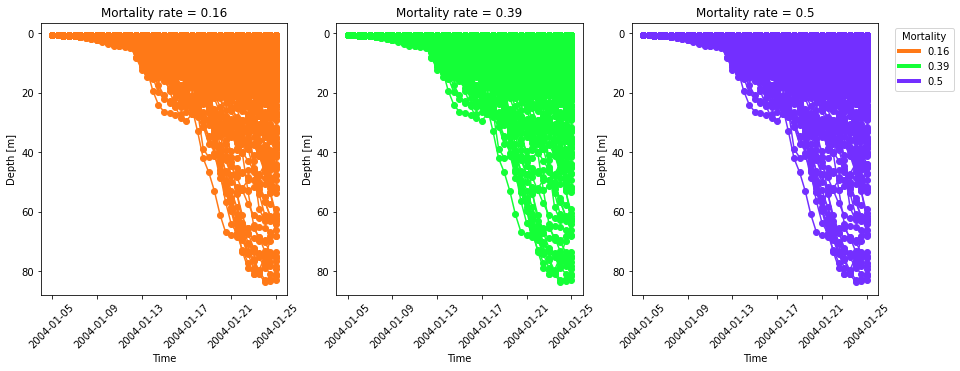

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.plot(ds_0['time'].T, ds_0['z'].T, marker='o', c=mort_cmap[0])
ax1.invert_yaxis()
ax1.set_title('Mortality rate = '+str(mortality[0]))
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

ax2.plot(ds_1['time'].T, ds_1['z'].T, marker='o', c=mort_cmap[1])
ax2.invert_yaxis()
ax2.set_title('Mortality rate = '+str(mortality[1]))
ax2.set_ylabel('Depth [m]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

ax3.plot(ds_2['time'].T, ds_2['z'].T, marker='o', c=mort_cmap[2])
ax3.invert_yaxis()
ax3.set_title('Mortality rate = '+str(mortality[2]))
ax3.set_ylabel('Depth [m]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=mort_cmap[0], lw=4),
                Line2D([0], [0], color=mort_cmap[1], lw=4),
                Line2D([0], [0], color=mort_cmap[2], lw=4)]

ax3.legend(custom_lines, [str(mortality[0]), str(mortality[1]), str(mortality[2])], title='Mortality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

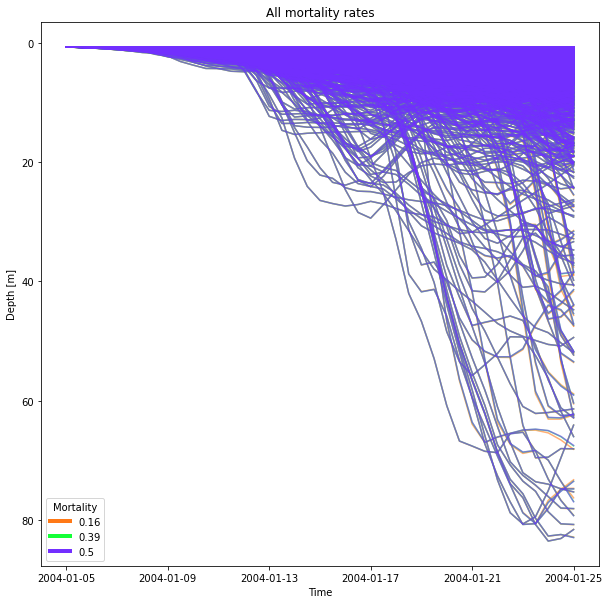

In [30]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

for i in range(len(mortality)):
    ax.plot(dslist[i]['time'].T, dslist[i]['z'].T, c=mort_cmap[i], alpha=0.6, label = 'a_mort = '+str(mortality[i]))

ax.set_title('All mortality rates')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time')

custom_lines = [Line2D([0], [0], color=mort_cmap[0], lw=4),
                Line2D([0], [0], color=mort_cmap[1], lw=4),
                Line2D([0], [0], color=mort_cmap[2], lw=4)]

plt.gca().invert_yaxis()
ax.legend(custom_lines, [str(mortality[0]), str(mortality[1]), str(mortality[2])], title='Mortality')
plt.show()

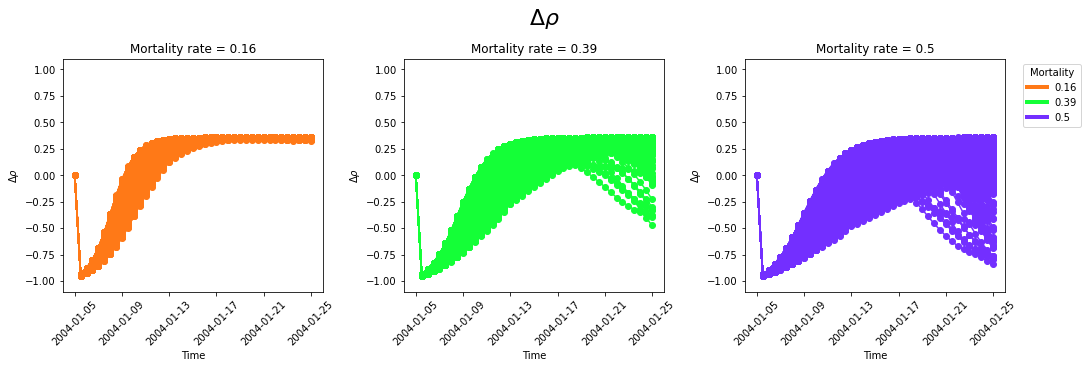

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('$\\Delta \\rho$', fontsize=22)

ax1.plot(ds_0['time'].T, ds_0['delta_rho'].T, marker='o', c=mort_cmap[0])
ax1.set_title('Mortality rate = '+str(mortality[0]))
ax1.set_ylabel('$\\Delta \\rho$')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-1.1,1.1)

ax2.plot(ds_1['time'].T, ds_1['delta_rho'].T, marker='o', c=mort_cmap[1])
ax2.set_title('Mortality rate = '+str(mortality[1]))
ax2.set_ylabel('$\\Delta \\rho$')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-1.1,1.1)

ax3.plot(ds_2['time'].T, ds_2['delta_rho'].T, marker='o', c=mort_cmap[2])
ax3.set_title('Mortality rate = '+str(mortality[2]))
ax3.set_ylabel('$\\Delta \\rho$')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-1.1,1.1)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=mort_cmap[0], lw=4),
                Line2D([0], [0], color=mort_cmap[1], lw=4),
                Line2D([0], [0], color=mort_cmap[2], lw=4)]

ax3.legend(custom_lines, [str(mortality[0]), str(mortality[1]), str(mortality[2])], title='Mortality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()